In [13]:
#Logistic Regression
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(2)
# dữ liệu dựa trên thời gian học của học sinh => trượt hoặc đậu kì thi
# X ; time study
X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
# y : label (0,1)
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])
# Build Xbar
Xbar = np.concatenate((np.ones((1,X.shape[1])),X), axis =0)
print( Xbar)

def sigmod(s):
    return 1/(1+np.exp(-s))
def logistic_sigmod_regression(w_init, Xbar, y, eta, max_count =10000, tol =1e-4):
    w =[w_init]
    count =0
    N = Xbar.shape[1]
    d = Xbar.shape[0]
    check_w_after = 20
    while count< max_count:
        #mix data
        mis_id = np.random.permutation(N)
        for i in mis_id:
            xi = Xbar[:,i].reshape(d,1)
            yi = y[i]
            zi =sigmod(np.dot(w[-1].T,xi))
            w_new = w[-1] - eta* (zi - yi)*xi
            count +=1
            # stopping criteria
            if count % check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w
d = Xbar.shape[0]
N = Xbar.shape[1]
eta =0.05
w_init = np.random.rand(d,1)
w = logistic_sigmod_regression(w_init, Xbar, y, eta)
print( w[-1])
print( 'y = ',sigmod(np.dot(w[-1].T, Xbar)) )

[[1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.   1.
  1.   1.   1.   1.   1.   1.  ]
 [0.5  0.75 1.   1.25 1.5  1.75 1.75 2.   2.25 2.5  2.75 3.   3.25 3.5
  4.   4.25 4.5  4.75 5.   5.5 ]]
[[-4.09258882]
 [ 1.55273657]]
y =  [[0.0350189  0.0507849  0.07311118 0.10417545 0.14635453 0.20176493
  0.20176493 0.27148216 0.35458818 0.44750729 0.54424317 0.6377521
  0.72187975 0.79281687 0.89267466 0.92459914 0.94758509 0.96383784
  0.97518295 0.98842726]]


[0.5  0.75 1.   1.25 1.5  1.75 2.   2.5  3.   3.5 ]
[0 0 0 0 0 0 0 0 0 0]
-4.092588822752519 1.5527365676023546


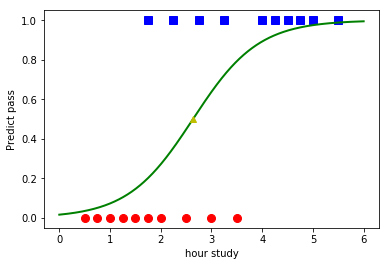

In [28]:
X0 = Xbar [1, np.where( y==0)][0]
y0 = y[np.where(y ==0)]
print(X0)
print(y0)
X1 = Xbar [1,np.where(y==1)][0]
y1 = y[np.where(y==1)]
plt.plot(X0,y0,'ro', markersize =8)
plt.plot(X1, y1, 'bs', markersize =8)
# vẽ sigmod
xx = np.linspace(0,6,1000)
w0 = w[-1][0][0]
w1 = w[-1][1][0]
print(w0, w1)
threshold = -w0/w1

yy = sigmod(w0 + w1*xx)
plt.plot(xx,yy,'g', linewidth =2)
plt.plot(threshold,0.5,'y^')
plt.xlabel('hour study')
plt.ylabel('Predict pass')
plt.show()

# Trong không gian 2 chiều